# Investing into index tracking ETFs



## Overview
Investing into index funds carry lower risk than investing into individual stocks. The benchmark to beat the market returns is hard and many active funds make worse than average returns.

Instead of investing into invidual stocks or actively managed funds, we can invest into a passive index fund to get an average market return. However, setting up a regular payment to invest into an index fund isn't the most effective strategy. We can get a slightly better return if we take advantage of the price movements.


## ETFs
Index tracking ETFs are low cost (0.07% p.a.) and allow investors to place limit orders. This makes it possible to take advantage of market's ups and downs. We need a strategy to take advantage of price swings of indexes and invest when the price is low.


## Goal
The goal is to get better return than **pound cost averaging** strategy. If the strategy works then it should be extended to other indexes like FTSE 250, S&P 500 etc. to diversify the portfolio.



## Investment Amount

Stocks and Shares ISA account allows £20,000 and 
Lifetime ISA allows £4,000 (+£1,000 government bonus) to be invested annually
tax free. This gives us a total of £25,000 to be invested tax free.


## Benchmark:
Our benchmark is total return of FTSE 100 tracking fund, investing regularly on the 10th of every month.


## ETFs Costs:
ETFs have a higher dealing charge than passive index fund. Passive index fund for FTSE 100 has an ongoing annual charge of 0.06% with £1.50 cost to buy or sell. On the other hand, investing into ETF's cost £9.95 (AJBell), as well as an ongoing annual charge of 0.07%. The investment strategy must give slightly better return to cover the dealing cost, otherwise we might do worse than the market.


## Summary:
- Invest into index tracking ETFs.
- Predict price movement and invest when the price is low.
- Get better return than someone investing into FTSE 100 (regular monthly payments).
- Maximise ISA and LISA accounts.
- Trade less to keep the costs low.


## Ideas:

- Invest £1,500 to £4,500 per trade.
- Invest 4-12 times throughout the year.
- Try to invest before ex-dividends dates.
- Predict the price movement of FTSE 100 and invest on lows.
- Find a strategy to take advantage of daily price movements.
- Find a strategy to sell (not urgent as we're investing for mid/long term).


## FTSE 100 - EDA

In [52]:
import pandas as pd

import plotly.graph_objects as go

import utils

import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
BASE_URL = 'https://docs.google.com/spreadsheets/d/10cihRP6XxJOSrWsASfW5C7VeHufD32TS0JKCXLoWhL8/export?format=csv&{}'

UKX_sheet = BASE_URL.format('gid=134530274')

ISF_sheet = BASE_URL.format('gid=1374752918')


### Read data and add new columns

In [27]:
# Read data
df = pd.read_csv(ISF_sheet)

# Rename columns
df = df.rename(columns={'Unnamed: 1': 'Open'})

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'].str[:10], format="%d/%m/%Y")

# Get datetime related fields
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year
df['dat_name'] = df['Date'].dt.day_name()
df['weekofyear'] = df['Date'].dt.weekofyear
df['is_quarter_end'] = df['Date'].dt.is_quarter_end
df['is_quarter_start'] = df['Date'].dt.is_quarter_start
df['quarter'] = df['Date'].dt.quarter
df['avg'] = round((df['High'] + df['Low']) / 2, 2) # $\frac{high + low}{2}$

In [28]:
df.head(2)

,Date,Open,High,Low,Close,Volume,month,year,dat_name,weekofyear,is_quarter_end,is_quarter_start,quarter,avg
0,2000-05-02,641.85,641.85,634.43,636.90,288807,May,2000,Tuesday,18,False,False,2,638.14
1,2000-05-03,630.72,630.72,620.21,620.21,291088,May,2000,Wednesday,18,False,False,2,625.46


### Highest, Lowest and Average Price by Quarter

In [31]:
price_type = 'Low'
tmp = (
    df[['Low', 'avg', 'High', 'year', 'quarter']]
    .groupby(['year', 'quarter'])
    .agg({'Low': 'min', 'avg': 'mean', 'High': 'max'})
    .reset_index()
)

tmp['date'] = pd.to_datetime(tmp['year'].astype(str) + '-' + (tmp['quarter']*3).astype(str) + '-01')

tmp.head(3)

,year,quarter,Low,avg,High,date
0,2000,2,601.65,635.445581,665.34,2000-06-01
1,2000,3,603.82,648.619365,685.75,2000-09-01
2,2000,4,608.15,633.060317,654.21,2000-12-01


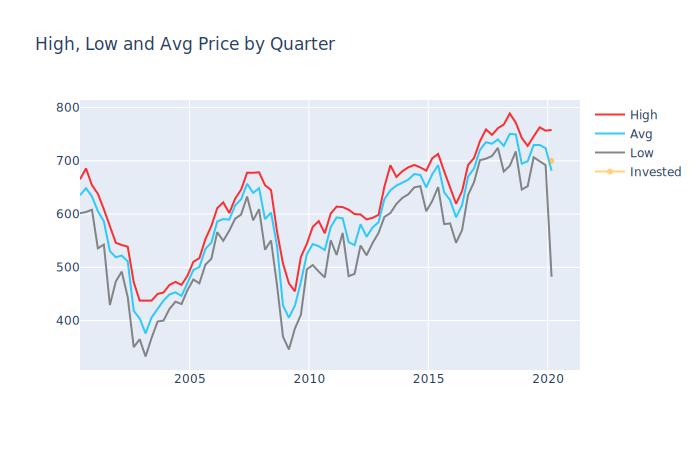

In [54]:
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")

fig = go.Figure()

fig.add_trace(go.Scatter(
                x=tmp['date'],
                y=tmp['High'],
                name="High",
                line_color='red',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=tmp['date'],
                y=tmp['avg'],
                name="Avg",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=tmp['date'],
                y=tmp['Low'],
                name="Low",
                line_color='dimgray',
                opacity=0.8))

# Personal Investments
fig.add_trace(go.Scatter(
                x=['2020-02-25'],
                y=[700, 600],
                name="Invested",
                line_color='orange',
                opacity=0.5))

# # Use date string to set xaxis range
fig.update_layout(
#     xaxis_range=['2016-07-01','2016-12-31'],
    title_text="High, Low and Avg Price by Quarter",
)
fig.show()

### Days with the highest difference between high and low price (%)

In [8]:
df['high_low_diff'] = round(((df['High'] - df['Low'])/df['Low']) * 100, 2)
df.sort_values(by='high_low_diff', ascending=False).head(5)

,Date,Open,High,Low,Close,Volume,month,year,dat_name,weekofyear,is_quarter_end,is_quarter_start,quarter,avg,high_low_diff
605,2002-09-24,447.75,447.75,363.27,405.50,1667346,September,2002,Tuesday,39,False,False,3,405.51,23.26
722,2003-03-12,349.00,392.25,332.50,332.75,4700711,March,2003,Wednesday,11,False,False,1,362.38,17.97
561,2002-07-23,398.70,404.75,350.00,350.00,1095590,July,2002,Tuesday,30,False,False,3,377.38,15.64
571,2002-08-06,404.75,416.42,361.00,361.00,1296269,August,2002,Tuesday,32,False,False,3,388.71,15.35
738,2003-04-03,437.50,437.50,381.00,383.50,4033746,April,2003,Thursday,14,False,False,2,409.25,14.83


In [9]:
p = 'Mean difference between daily high and low over the last 20 year: {}%'.format(df['high_low_diff'].mean().round(2))
print(p)

Mean difference between daily high and low over the last 20 year: 1.44%


### High/Low difference by month

In [10]:
agg_df = (
    df[['year', 'month', 'High', 'Low']]
    .groupby(['year', 'month'])
    .agg({'High': 'max', 'Low': 'min'})
    .reset_index()
    )

agg_df['high_low_diff'] = round(((agg_df['High'] - agg_df['Low'])/agg_df['Low']) * 100, 2)

In [11]:
agg_df.sort_values(by='high_low_diff', ascending=False).head(10)

,year,month,High,Low,high_low_diff
238,2020,March,681.30,482.25,41.28
102,2008,October,507.00,369.75,37.12
25,2002,July,472.07,350.00,34.88
36,2003,January,437.50,341.50,28.11
21,2002,August,460.25,361.00,27.49
31,2002,September,457.75,363.27,26.01
19,2001,September,540.44,429.13,25.94
101,2008,November,467.00,379.25,23.14
138,2011,October,600.00,487.70,23.03
96,2008,January,654.25,533.00,22.75


#### FTSE 100 in October 2008

We see that during October 2008, the highest price was 6314 and the lowest 3665, which a percentage difference of a massive 72%!!!

#### Dates of highest high and lowest low in October 2008

In [12]:
(
    df
    .loc[(df['year'] == 2008) & (df['month'] == 'October'), ['High', 'Date']]
    .sort_values(by='High', ascending=False)
    .head(5)
)

,High,Date
2122,507.0,2008-10-02
2121,503.5,2008-10-01
2123,503.0,2008-10-03
2124,481.0,2008-10-06
2125,477.5,2008-10-07


In [13]:
(
    df
    .loc[(df['year'] == 2008) & (df['month'] == 'October'), ['Low', 'Date']]
    .sort_values(by='Low', ascending=True)
    .head(5)
)

,Low,Date
2139,369.75,2008-10-27
2138,372.75,2008-10-24
2132,384.50,2008-10-16
2140,387.75,2008-10-28
2128,388.75,2008-10-10


We see that the highest price in October 2008 was £6,314.50 on the 1st and the lowest price was £3,665.21 on the 27th.

## Strategy - 10 day Average lows

There is no way to predict that the price would've dropped down to 3665 at the end of the month. However, what if we took the average lows for the first 10 days of October and put a limit order of anything below that average price. Would we have gotten a better price? 

Lets find out!

In [14]:
avg_low = (
    df
    .loc[(df['year'] == 2008) & (df['month'] == 'October'), ['Date', 'Low']]
    .iloc[:10]
    .loc[:, 'Low']
    .mean()
    .round(2)
)

print('Average lowest price in first 10 days of October: £{:,}'.format(avg_low))

Average lowest price in first 10 days of October: £446.48


#### Lets now check the daily average difference between high and low price in the first 10 days of October

In [15]:
agg_df = (
    df
    .loc[(df['year'] == 2008) & (df['month'] == 'October')]
    .iloc[:10]
    .loc[:, ['Date', 'High', 'Low']]
)

agg_df['high_low_diff'] = utils.get_high_low_difference(agg_df['High'], agg_df['Low'])

agg_df.head(5)

,Date,High,Low,high_low_diff
2121,2008-10-01,503.5,491.75,2.39
2122,2008-10-02,507.0,489.75,3.52
2123,2008-10-03,503.0,485.00,3.71
2124,2008-10-06,481.0,457.25,5.19
2125,2008-10-07,477.5,454.00,5.18


In [16]:
mean_diff = agg_df['high_low_diff'].mean()

print('The average % difference between high and low during the first 10 days of october: {}%'.format(mean_diff))

The average % difference between high and low during the first 10 days of october: 5.572%


### Days with the highest difference between Open and Close Price (%)

In [19]:
df['open_close_diff'] = round(((df['Close'] - df['Open'])/df['Open']) * 100, 2)

#### Biggest decrease between open and close

In [20]:
df.sort_values(by='open_close_diff', ascending=True).head(5)

,Date,Open,High,Low,Close,Volume,month,year,dat_name,weekofyear,is_quarter_end,is_quarter_start,quarter,avg,high_low_diff,open_close_diff
738,2003-04-03,437.50,437.50,381.00,383.5,4033746,April,2003,Thursday,14,False,False,2,409.25,14.83,-12.34
561,2002-07-23,398.70,404.75,350.00,350.0,1095590,July,2002,Tuesday,30,False,False,3,377.38,15.64,-12.21
571,2002-08-06,404.75,416.42,361.00,361.0,1296269,August,2002,Tuesday,32,False,False,3,388.71,15.35,-10.81
683,2003-01-15,435.31,435.31,390.25,391.5,1009264,January,2003,Wednesday,3,False,False,1,412.78,11.55,-10.06
583,2002-08-22,449.00,449.00,405.00,405.0,2055893,August,2002,Thursday,34,False,False,3,427.00,10.86,-9.80


#### Biggest increase between open and close

In [21]:
df.sort_values(by='open_close_diff', ascending=True).tail(5)

,Date,Open,High,Low,Close,Volume,month,year,dat_name,weekofyear,is_quarter_end,is_quarter_start,quarter,avg,high_low_diff,open_close_diff
1945,2008-01-22,535.00,587.00,533.0,574.25,22788832,January,2008,Tuesday,4,False,False,1,560.00,10.13,7.34
588,2002-08-30,424.61,460.25,419.0,460.25,1327659,August,2002,Friday,35,False,False,3,439.62,9.84,8.39
719,2003-03-07,360.50,394.00,350.4,394.00,2510259,March,2003,Friday,10,False,False,1,372.20,12.44,9.29
564,2002-07-26,361.00,406.50,361.0,395.00,1514728,July,2002,Friday,30,False,False,3,383.75,12.60,9.42
595,2002-09-10,407.50,457.75,407.5,457.75,1510964,September,2002,Tuesday,37,False,False,3,432.62,12.33,12.33


In [43]:
# !jupyter nbconvert --to notebook --execute FTSE\ 100\ -\ EDA.ipynb

[NbConvertApp] Converting notebook FTSE 100 - EDA.ipynb to notebook
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] Writing 3501740 bytes to FTSE 100 - EDA.nbconvert.ipynb
